# MR分析

In [88]:
import pandas as pd

# 读取文件
file_path = "WY_计算随访时间_cataract_更新的截止时间.csv"
df = pd.read_csv(file_path)

# ===========================================
# 字段标准化映射表（原始字段 → 统一字段）
# ===========================================
column_mapping = {
    # 1. 人口学与社会经济学特征
    "sex": "sex",
    "ethnic_background": "ethnic_background",
    "ethnic_l": "ethnic_l",
    "ethnic": "ethnic",
    "education_bl": "education_baseline",
    "age_bl": "age_baseline",

    # 2. 生活方式与行为因素
    "csmoking_bl": "smoking_status_baseline",
    
    "alcohol_freq_bl": "alcohol_frequency_baseline",
    "alcohol_bl": "alcohol_frequency_baseline1",
    "sleep_dur_bl": "sleep_duration_baseline",

    # 3. 人体测量学指标
    "bmi_bl": "bmi_baseline",
    "obesity": "obesity_status",

    # 4. 基线健康状况
    "diabetes_bl": "diabetes_baseline",
    "hypertension_bl": "hypertension_baseline",
    "heart_attack_bl": "myocardial_infarction_baseline",
    "heart_failure_bl": "heart_failure_baseline",
    "stroke_bl": "stroke_baseline",
    "kidney_stone_bl": "kidney_stone_baseline",
    "depression_bl": "depression_baseline",
    "cancer_bl": "cancer_baseline",
    "heart_disease": "heart_disease_composite",

    # 5. 眼科疾病基线状态
    "amd_bl": "amd_baseline",
    "amd_bl1": "amd_baseline1",
    "amd_blt": "amd_baseline2",
    "cataract_bl": "cataract_baseline",
    "glaucoma_bl": "glaucoma_baseline",
    "gla_blt": "glaucoma_baseline1",
    "diabetic_eye_bl": "diabetic_retinopathy_baseline",
    "dr_bl": "diabetic_retinopathy_baseline",
    "dr_blt": "diabetic_retinopathy_baseline",

    # 6. 实验室检测指标
    "hba1c_bl": "hba1c_baseline",
    "total_cholesterol": "total_cholesterol",
    "ldl_cholesterol": "ldl_cholesterol",
    "hdl_cholesterol": "hdl_cholesterol",
    "triglycerides": "triglycerides",

    # 7. 脂肪酸代谢指标
    "total_fa": "fatty_acids_total",
    "n3fa": "fatty_acids_n3",
    "n6fa": "fatty_acids_n6",
    "pufa": "fatty_acids_pufa",
    "mufa": "fatty_acids_mufa",
    "sfa": "fatty_acids_sfa",
    "la": "fatty_acids_la",
    "dha": "fatty_acids_dha",

    # 8. 遗传风险评分
    "n3fa_grs": "n3fa_grs",
    "n6fa_grs": "n6fa_grs",
    "pufa_grs": "pufa_grs",
    "tfa_grs": "tfa_grs",

    # 9. 年龄分层分类
    "age_layer2": "age_quantile_2",
    "age50": "age_threshold_50",
    "age57": "age_threshold_57",
    "age60": "age_threshold_60",

    # 10. 随访与时间变量
    "date_interview": "interview_date",
    "date_interview_time": "interview_date",
    "lastdate": "last_followup_date",
    "followup_cataract_yrs": "followup_duration_cataract_yrs",
    "followup_cataract": "followup_duration_cataract",
    "followup_cataract_182": "followup_duration_cataract_182",
    "followdate_cataract": "followup_date_cataract",
    "eligible": "eligible_status",

    # 11. 疾病发病与结局事件
    "amd_onset": "amd_onset_date",
    "amd_onset_date": "amd_onset_date",
    "amd_onset_time": "amd_onset_date",
    "amd_days": "amd_time_to_event_days",
    "cataract_onset": "cataract_onset_date",
    "cataract_onset_date": "cataract_onset_date",
    "cataract_days": "cataract_time_to_event_days",
    "incident_cataract": "cataract_incident",
    "diabetic_eye_onset": "diabetic_eye_onset_date",
    "diabetic_eye_onset_date": "diabetic_eye_onset_date",
    "diabetic_eye_days": "diabetic_eye_time_to_event_days",
    "glaucoma_onset": "glaucoma_onset_date",
    "glaucoma_onset_date": "glaucoma_onset_date",
    "glaucoma_days": "glaucoma_time_to_event_days",

    # 12. 模型输出
    "amd_prediction": "amd_risk_prediction",
    "cataract_prediction": "cataract_risk_prediction",
    "diabetic_eye_prediction": "diabetic_eye_risk_prediction",
    "glaucoma_prediction": "glaucoma_risk_prediction",

    # 13. 数据管理标识
    "f_eid": "participant_id",
    "analysis_fa": "analysis_flag_fatty_acids",
    "metabolomic_age": "metabolomic_age",
}

# ==================================================
# 自动将 df 的列名映射到新名称（若存在）
# ==================================================
df = df.rename(columns={orig: new for orig, new in column_mapping.items() if orig in df.columns})

# 输出前 5 行，确认成功读取
print(df.head())

# 输出列名，确认字段统一
print("\n统一后的字段名：")
print(df.columns.tolist())


   ethnic_background  sex  education_baseline  sleep_duration_baseline  \
0               1001    1                   1                        7   
1               1002    1                   3                        7   
2               1001    1                   0                        7   
3               1001    0                   5                        8   
4               1001    1                   0                       12   

   smoking_status_baseline  alcohol_frequency_baseline  bmi_baseline  \
0                      2.0                         3.0          27.2   
1                      2.0                         3.0          22.8   
2                      0.0                         2.0          28.6   
3                      0.0                         5.0          34.0   
4                      2.0                         6.0          20.0   

   age_baseline  diabetes_baseline  cancer_baseline  ...  \
0            43                  0              0.0  ...   
1 

步骤0 - 初始人数: 174,614 人

【步骤1 - 排除随访时间 < 365 天】
排除前: 174,614 人
排除后: 164,014 人
减少人数: 10,600 人

【步骤1.5 - 排除 alcohol_frequency_baseline 缺失】
alcohol_frequency_baseline 缺失人数: 241
筛选前: 164,014 人
筛选后: 163,773 人
减少人数: 241 人

【步骤2 - 筛选脂肪酸数据完整的人群】
脂肪酸列: ['fatty_acids_total', 'fatty_acids_n3', 'fatty_acids_n6', 'fatty_acids_pufa', 'fatty_acids_mufa', 'fatty_acids_sfa', 'fatty_acids_la', 'fatty_acids_dha']
筛选前: 163,773 人
筛选后: 35,534 人
减少人数: 128,239 人

【步骤3 - 筛选最终有效人群】
保留: >=365天（晚期发病组）和空值（未发病组）
排除: <365天（早期发病组）
筛选前: 35,534 人
筛选后: 35,534 人
减少人数: 0 人

【步骤4 - 创建分组变量】
发病组(>=365天): 3,690 人
对照组(空值): 31,844 人
总计: 35,534 人
发病组内：早期(<365天)=0，晚期(>=365天)=3,690

【倾向评分模型】
模型系数: {'age_baseline': np.float64(1.0106833758038232), 'sex': np.float64(-0.15158288026680145)}
模型截距: -2.5109
模型样本数: 35,534

【OR值解读】
age_baseline: OR=2.75
sex: OR=0.86

【开始1:1最近邻匹配】
卡尺值: 0.1
成功匹配对数: 3690
匹配后总样本数: 7,380
病例组: 3,690
对照组: 3,690

【匹配质量评估 - 标准化均数差（SMD）】
age_baseline:
 匹配前SMD: 0.7835 ❌
 匹配后SMD: 0.0000 ✅
sex:
 匹配前SMD: 0.1153 ❌
 匹配后SMD: 

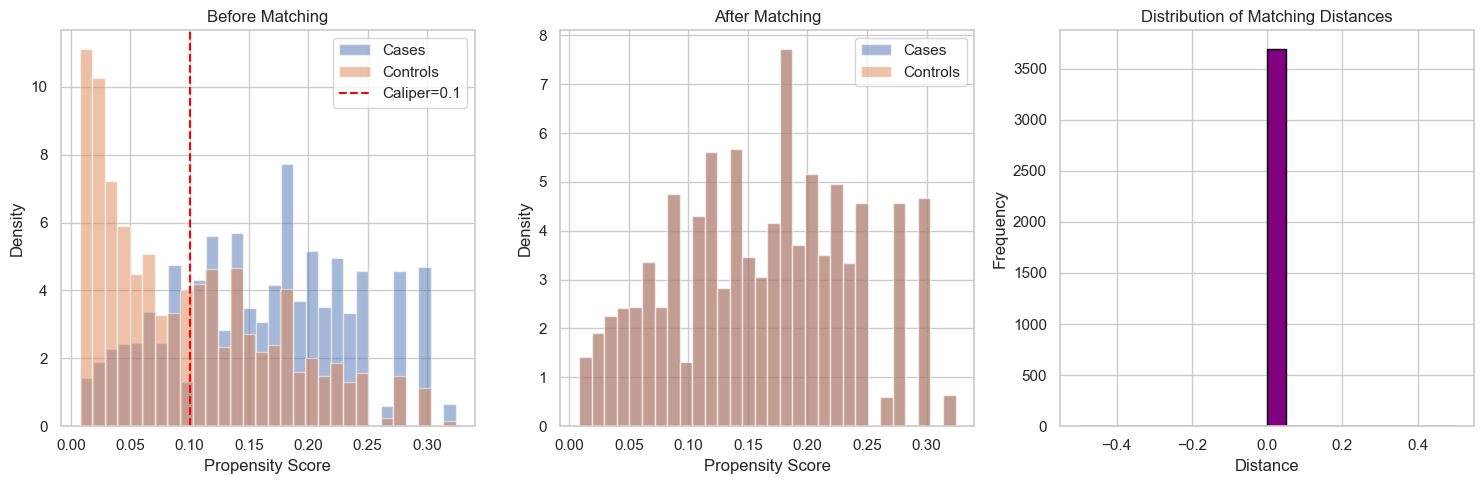

In [89]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# =================================================
# 1. 数据准备与分组
# =================================================
# 步骤0: 打印初始人数（基于最原始的数据）
initial_n = len(df)
print(f"=" * 65)
print(f"步骤0 - 初始人数: {initial_n:,} 人")
print("=" * 65)

# 创建二分类变量：是否发病
cataract_days_col = 'cataract_time_to_event_days'

if cataract_days_col not in df.columns:
    print(f"❌ 错误：列 '{cataract_days_col}' 不存在！")
else:
    # =================================================
    # =================================================
    # 步骤1: 排除随访时间不足 1年的人
    # =================================================
    print("\n【步骤1 - 排除随访时间 < 365 天】")

    pre_step1_n = len(df)

    if "followup_duration_cataract" not in df.columns:
        raise ValueError("❌ 缺少 followup_duration_cataract 列，无法进行随访时间筛选")

    # 关键点：只根据随访时间筛选，不碰 event time
    df_step1 = df.loc[
    df["followup_duration_cataract"].notna() &
    (df["followup_duration_cataract"] >= 365)
    ].copy()

    after_step1_n = len(df_step1)
    removed_step1_n = pre_step1_n - after_step1_n

    print(f"排除前: {pre_step1_n:,} 人")
    print(f"排除后: {after_step1_n:,} 人")
    print(f"减少人数: {removed_step1_n:,} 人")
    print("=" * 65)

    # =================================================
    # 步骤1.5: 排除 alcohol_frequency_baseline 为空
    # =================================================
    print("\n【步骤1.5 - 排除 alcohol_frequency_baseline 缺失】")

    pre_step15_n = len(df_step1)

    if "alcohol_frequency_baseline" in df_step1.columns:
        n_missing_alcohol = df_step1["alcohol_frequency_baseline"].isna().sum()
        
        print(f"alcohol_frequency_baseline 缺失人数: {n_missing_alcohol:,}")
        
        df_step15 = df_step1.dropna(
            subset=["alcohol_frequency_baseline"]
        ).copy()
        
        after_step15_n = len(df_step15)
        removed_step15_n = pre_step15_n - after_step15_n
        
        print(f"筛选前: {pre_step15_n:,} 人")
        print(f"筛选后: {after_step15_n:,} 人")
        print(f"减少人数: {removed_step15_n:,} 人")
    else:
        print("⚠️  警告：未找到 alcohol_frequency_baseline 列，跳过该步骤")
        df_step15 = df_step1.copy()

    print("=" * 65)

    # =================================================
    
    # 步骤2: 去掉脂肪酸数据不完整的，创建 df_fa_complete
    # =================================================
    print("\n【步骤2 - 筛选脂肪酸数据完整的人群】")
    
    # 定义脂肪酸核心列
    fa_core_cols = ['fatty_acids_total', 'fatty_acids_n3', 'fatty_acids_n6',
                    'fatty_acids_pufa', 'fatty_acids_mufa', 'fatty_acids_sfa',
                    'fatty_acids_la', 'fatty_acids_dha']
    
    # 检查哪些列实际存在
    existing_fa_core = [col for col in fa_core_cols if col in df_step15.columns]
    
    if not existing_fa_core:
        print("⚠️  警告：未找到任何脂肪酸数据列！")
    
    pre_step2_n = len(df_step15)
    
    # 剔除脂肪酸数据不完整的记录 
    df_fa_complete = df_step15.dropna(subset=existing_fa_core).copy()
    
    after_step2_n = len(df_fa_complete)
    removed_step2_n = pre_step2_n - after_step2_n
    
    print(f"脂肪酸列: {existing_fa_core}")
    print(f"筛选前: {pre_step2_n:,} 人")
    print(f"筛选后: {after_step2_n:,} 人")
    print(f"减少人数: {removed_step2_n:,} 人")
    print("=" * 65)
    
    # =================================================
    # 步骤3: 筛选有效人群（只保留>=183天和空值）
    # =================================================
    print("\n【步骤3 - 筛选最终有效人群】")
    print("保留: >=365天（晚期发病组）和空值（未发病组）")
    print("排除: <365天（早期发病组）")
    
    pre_step3_n = len(df_fa_complete)
    
    # 创建筛选掩码：只保留 >=365 或 空值
    valid_mask = (
        (df_fa_complete[cataract_days_col] >= 365) | 
        (df_fa_complete[cataract_days_col].isna())
    )
    df_fa_complete = df_fa_complete[valid_mask].copy()
    
    after_step3_n = len(df_fa_complete)
    removed_step3_n = pre_step3_n - after_step3_n
    
    print(f"筛选前: {pre_step3_n:,} 人")
    print(f"筛选后: {after_step3_n:,} 人")
    print(f"减少人数: {removed_step3_n:,} 人")
    print("=" * 65)
    
    # =================================================
    # 步骤4: 创建分组变量并准备PSM数据
    # =================================================
    print("\n【步骤4 - 创建分组变量】")
    
    # 创建二分类分组变量
    df_fa_complete['cataract_event'] = np.where(
        df_fa_complete[cataract_days_col] > 0,
        1,  # 发病组（>=365天）
        0   # 未发病组（空值）
    )
    
    # 复制数据用于PSM分析
    df_psm = df_fa_complete.copy()
    
    # 定义PSM分组变量
    df_psm['cataract_group'] = df_psm['cataract_event']
    
    # 检查分组样本量
    n_case = df_psm['cataract_group'].sum()
    n_control = (df_psm['cataract_group'] == 0).sum()
    
    print(f"发病组(>=365天): {n_case:,} 人")
    print(f"对照组(空值): {n_control:,} 人")
    print(f"总计: {len(df_psm):,} 人")
    print("=" * 65)
    
    # 统计发病组内时间分布
    days_series = df_psm.loc[df_psm['cataract_event'] == 1, cataract_days_col]
    early_count = (days_series < 365).sum()
    late_count = (days_series >= 365).sum()
    print(f"发病组内：早期(<365天)={early_count:,}，晚期(>=365天)={late_count:,}")
    print("=" * 65)
    
   # =================================================
    # 5. 倾向评分计算
    # =================================================
    # 匹配变量：年龄、性别
    match_vars = ['age_baseline', 'sex']

    # 检查缺失值并清理
    missing_count = df_psm[match_vars].isnull().sum()
    if missing_count.any():
        print(f"\n⚠️  发现缺失值:\n{missing_count}")
        print("正在剔除含缺失值的记录...")
        clean_mask = df_psm[match_vars].notna().all(axis=1)
        pre_clean_n = len(df_psm)
        df_psm = df_psm[clean_mask].copy()
        after_clean_n = len(df_psm)
        removed_clean_n = pre_clean_n - after_clean_n
        print(f"清理前: {pre_clean_n:,} 人")
        print(f"清理后: {after_clean_n:,} 人")
        print(f"减少人数: {removed_clean_n:,} 人")

    # 对 df_psm 的 sex 列进行编码（关键修复）
    if df_psm['sex'].dtype == 'object':
        df_psm['sex'] = df_psm['sex'].astype(str).str.strip()
        df_psm['sex'] = df_psm['sex'].map({'Female': 0, 'Male': 1})
    elif isinstance(df_psm['sex'].dtype, pd.CategoricalDtype):
        df_psm['sex'] = df_psm['sex'].cat.codes

    # 提取特征和标签
    # X 是 年龄 + 性别 
    # y 是 是否发病
    X = df_psm[match_vars].copy()
    y = df_psm['cataract_group']

    # 标准化连续变量
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 逻辑回归
    ps_model = LogisticRegression(random_state=42, max_iter=1000)
    ps_model.fit(X_scaled, y)

    # 预测倾向评分（所有人）
    df_psm['propensity_score'] = ps_model.predict_proba(X_scaled)[:, 1]

    # 保存倾向评分模型信息
    model_info = {
        'variables': match_vars,
        'coefficients': dict(zip(['age_baseline', 'sex'], ps_model.coef_[0])),
        'intercept': ps_model.intercept_[0],
        'n_samples': len(df_psm)
    }

    print("\n【倾向评分模型】")
    print(f"模型系数: {model_info['coefficients']}")
    print(f"模型截距: {model_info['intercept']:.4f}")
    print(f"模型样本数: {model_info['n_samples']:,}")

    # 计算OR值
    import math
    print("\n【OR值解读】")
    for var, coef in model_info['coefficients'].items():
        or_value = math.exp(coef)
        print(f"{var}: OR={or_value:.2f}")
    # =================================================
    # 6. 1:1最近邻匹配（卡尺0.1）
    # =================================================
    case_df = df_psm[df_psm['cataract_group'] == 1].copy()
    control_df = df_psm[df_psm['cataract_group'] == 0].copy()
    
    print("\n" + "=" * 65)
    print("【开始1:1最近邻匹配】")
    print(f"卡尺值: 0.1")
    print("=" * 65)
    
    # 计算距离矩阵
    case_ps = case_df['propensity_score'].values.reshape(-1, 1)
    control_ps = control_df['propensity_score'].values.reshape(-1, 1)
    distances = cdist(case_ps, control_ps, metric='euclidean')
    
    # 执行匹配
    matched_pairs = []
    used_controls = set()
    
    for i, case_id in enumerate(case_df['participant_id']):
        case_score = case_df.iloc[i]['propensity_score']
        
        # 找到最近邻
        sorted_indices = np.argsort(distances[i])
        for j in sorted_indices:
            control_id = control_df.iloc[j]['participant_id']
            
            if control_id not in used_controls:
                distance = distances[i, j]
                # 卡尺判断
                if abs(case_score - control_df.iloc[j]['propensity_score']) < 0.1:
                    matched_pairs.append({
                        'case_id': case_id,
                        'control_id': control_id,
                        'distance': distance,
                        'case_ps': case_score,
                        'control_ps': control_df.iloc[j]['propensity_score']
                    })
                    used_controls.add(control_id)
                    break
    
    print(f"成功匹配对数: {len(matched_pairs)}")
    
    if len(matched_pairs) < len(case_df):
        print(f"⚠️  警告: 有 {len(case_df) - len(matched_pairs)} 例病例未找到匹配对照")
    
    # 创建匹配数据集
    matched_case_ids = [p['case_id'] for p in matched_pairs]
    matched_control_ids = [p['control_id'] for p in matched_pairs]
    
    df_matched = df_psm[df_psm['participant_id'].isin(matched_case_ids + matched_control_ids)].copy()
    
    # 添加匹配标识
    df_matched['matched_pair_id'] = df_matched['participant_id'].map(
        {**{p['case_id']: i for i, p in enumerate(matched_pairs)},
         **{p['control_id']: i for i, p in enumerate(matched_pairs)}}
    )
    df_matched['is_case'] = df_matched['participant_id'].isin(matched_case_ids).astype(int)
    
    print(f"匹配后总样本数: {len(df_matched):,}")
    print(f"病例组: {len(matched_case_ids):,}")
    print(f"对照组: {len(matched_control_ids):,}")
    print("=" * 65)
    
    # =================================================
    # 7. 匹配质量评估（SMD）
    # =================================================
    print("\n" + "=" * 65)
    print("【匹配质量评估 - 标准化均数差（SMD）】")
    print("=" * 65)
    
    def calculate_smd(group1, group2, continuous=True):
        """计算标准化均数差"""
        if continuous:
            mean_diff = group1.mean() - group2.mean()
            pooled_sd = np.sqrt(((len(group1)-1)*group1.std()**2 + 
                                 (len(group2)-1)*group2.std()**2) / 
                                (len(group1)+len(group2)-2))
            return abs(mean_diff) / pooled_sd
        else:
            p1 = group1.mean()
            p2 = group2.mean()
            return abs(p1 - p2) / np.sqrt((p1*(1-p1) + p2*(1-p2)) / 2)
    
    smd_results = []
    for var in match_vars:
        # 匹配前
        case_before = df_psm[df_psm['cataract_group'] == 1][var]
        control_before = df_psm[df_psm['cataract_group'] == 0][var]
        smd_before = calculate_smd(case_before, control_before, 
                                   continuous=(var != 'sex'))
        
        # 匹配后
        case_after = df_matched[df_matched['is_case'] == 1][var]
        control_after = df_matched[df_matched['is_case'] == 0][var]
        smd_after = calculate_smd(case_after, control_after, 
                                  continuous=(var != 'sex'))
        
        print(f"{var}:")
        print(f" 匹配前SMD: {smd_before:.4f} {'✅' if smd_before < 0.1 else '❌'}")
        print(f" 匹配后SMD: {smd_after:.4f} {'✅' if smd_after < 0.1 else '❌'}")
        
        smd_results.append({
            'variable': var,
            'smd_before': smd_before,
            'smd_after': smd_after
        })
    
    # =================================================
    # 8. 亚组分析（保持不变）
    # =================================================
    # 按年龄分层
    print("\n" + "=" * 65)
    print("【亚组分析 - 按年龄分层】")
    print("=" * 65)
    
    df_matched['age_group'] = pd.cut(
        df_matched['age_baseline'], 
        bins=[0, 50, 60, 70, 100], 
        labels=['<50', '50-59', '60-69', '≥70']
    )
    
    age_subgroup = []
    for age_grp, group in df_matched.groupby('age_group'):
        n_case = group['is_case'].sum()
        n_control = (group['is_case'] == 0).sum()
        ratio = n_case / n_control if n_control > 0 else np.inf
        
        print(f"{age_grp}岁组: 病例{n_case:,}，对照{n_control:,}，比例{ratio:.2f}")
        
        age_subgroup.append({
            'age_group': str(age_grp),
            'n_cases': n_case,
            'n_controls': n_control,
            'ratio': ratio
        })
    
    # 按性别分层
    print("\n" + "=" * 65)
    print("【亚组分析 - 按性别分层】")
    print("=" * 65)
    
    sex_subgroup = []
    for sex_val, group in df_matched.groupby('sex'):
        sex_label = 'Female' if sex_val == 0 else 'Male'
        n_case = group['is_case'].sum()
        n_control = (group['is_case'] == 0).sum()
        ratio = n_case / n_control if n_control > 0 else np.inf
        
        print(f"{sex_label}: 病例{n_case:,}，对照{n_control:,}，比例{ratio:.2f}")
        
        sex_subgroup.append({
            'sex': sex_label,
            'n_cases': n_case,
            'n_controls': n_control,
            'ratio': ratio
        })
    
    # =================================================
    # 9. 可视化（保持不变）
    # =================================================
    plt.figure(figsize=(15, 5))
    
    # 倾向评分分布  
    plt.subplot(1, 3, 1)
    plt.hist(df_psm[df_psm['cataract_group']==1]['propensity_score'], 
             alpha=0.5, label='Cases', bins=30, density=True)
    plt.hist(df_psm[df_psm['cataract_group']==0]['propensity_score'], 
             alpha=0.5, label='Controls', bins=30, density=True)
    plt.axvline(x=0.1, color='red', linestyle='--', label='Caliper=0.1')
    plt.title("Before Matching")
    plt.xlabel("Propensity Score")
    plt.ylabel("Density")
    plt.legend()
    
    # 匹配后分布
    plt.subplot(1, 3, 2)
    plt.hist(df_matched[df_matched['is_case']==1]['propensity_score'], 
             alpha=0.5, label='Cases', bins=30, density=True)
    plt.hist(df_matched[df_matched['is_case']==0]['propensity_score'], 
             alpha=0.5, label='Controls', bins=30, density=True)
    plt.title("After Matching")
    plt.xlabel("Propensity Score")
    plt.ylabel("Density")
    plt.legend()
    
    # 匹配对距离分布
    distances = [p['distance'] for p in matched_pairs]
    plt.subplot(1, 3, 3)
    plt.hist(distances, bins=20, color='purple', edgecolor='black')
    plt.title("Distribution of Matching Distances")
    plt.xlabel("Distance")
    plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()

In [90]:
# -*- coding: utf-8 -*- 
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency, fisher_exact
from IPython.display import display

# -------------------------
# 辅助函数
# -------------------------
# ===============================
# ★ 新增：Z-score 标准化
# ===============================
def zscore_by_ref(series, mean, std):
    if std == 0 or np.isnan(std):
        return series * np.nan
    return (series - mean) / std
def format_p(p):
    if p is None or (isinstance(p, float) and np.isnan(p)):
        return ""
    return "<0.001" if p < 0.001 else f"{p:.3f}"

def fmt_mean_sd(series):
    series = series.dropna()
    if len(series) == 0:
        return ""
    return f"{series.mean():.2f} ± {series.std(ddof=1):.2f}"

def fmt_n_pct(n, total):
    if total == 0 or np.isnan(total):
        return f"{int(n)} (0.00%)"
    return f"{int(n)} ({n/total*100:.2f}%)"

def p_value_continuous(x1, x2):
    x1 = x1.dropna()
    x2 = x2.dropna()
    if len(x1)<2 or len(x2)<2:
        return np.nan
    try:
        _, p = ttest_ind(x1, x2, equal_var=False, nan_policy='omit')
        return p
    except:
        return np.nan

def p_value_categorical(tab):
    if tab.empty:
        return np.nan
    if tab.shape[0]==2 and tab.shape[1]==2:
        try:
            return fisher_exact(tab.values.astype(int))[1]
        except:
            return chi2_contingency(tab.values.astype(int))[1]
    else:
        try:
            return chi2_contingency(tab.values.astype(int))[1]
        except:
            return np.nan

# -------------------------
# 构建 Table1
# -------------------------
def build_table1_psm(df_before, df_after,
                     group_before='cataract_group',
                     group_after='is_case',
                     group_labels=('对照组','白内障组')):

    # ---------- 去除重复列 ----------
    df_before = df_before.loc[:, ~df_before.columns.duplicated()]
    df_after = df_after.loc[:, ~df_after.columns.duplicated()]

    rows = []

    # ===============================
    # ★ 修改点 1：education_baseline 统一重编码
    # ===============================
    for df in [df_before, df_after]:
        if 'education_baseline' in df.columns:
            df['education_bin'] = df['education_baseline'].apply(
                lambda x: 1 if x == 1 else 0
            )
    # ↑ education_bin：
    #   1 = College / University
    #   0 = Others（包括 0 / 2 / 3 / NaN）

    # ===============================
    # ★ 修改点 2：Smoking status 统一重编码
    # ===============================
    for df in [df_before, df_after]:
        if 'smoker' in df.columns:
            df['Smoking status'] = df['smoker'].apply(
                lambda x: 1 if x == 1 else 0
            )
    # ↑ Smoking status：
    #   1 = Never
    #   qita  = Current

    # ===============================
    # ★ 修改点 3：Alcohol use 统一重编码
    # ===============================
    for df in [df_before, df_after]:
        if 'alcohol_frequency_baseline' in df.columns:
            df['Alcohol use'] = df['alcohol_frequency_baseline'].apply(
                lambda x: 1 if x == 1 else 0
            )
    # ↑ Smoking status：
    #   1 = Never/occasional
    #   qita  = Frequent

    # ===============================
    # ★ 新增：AMD / Glaucoma / Diabetes 统一二分类重编码
    # ===============================
    for df in [df_before, df_after]:

        if 'amd_baseline' in df.columns:
            df['amd'] = df['amd_baseline'].apply(
                lambda x: 0 if x == 0 else 1
            )

        if 'glaucoma_baseline' in df.columns:
            df['glaucoma'] = df['glaucoma_baseline'].apply(
                lambda x: 1 if x == 1 else 0
            )

        if 'diabetic_retinopathy_baseline' in df.columns:
            df['diabetes'] = df['diabetic_retinopathy_baseline'].apply(
                lambda x: 1 if x == 1 else 0
        )
    # ---------- 连续变量 ----------
    continuous_vars = {
        'age_baseline': 'Age in years, mean (SD)',
        'bmi_baseline': 'BMI (SD)',
        'cataract_time_to_event_days': '白内障发病时间（天）'
    }

    # ---------- 分类变量 ----------
    categorical_vars = {
        'sex': {0:'Female',1:'Male'},
        'Ethnicity': {'White':'White', 'Others':'Others'},  # 稍后生成
        'education_bin': {1:'College/University', 0:'Others'},
        'Smoking status': {0:'Never',1:'Current'},
        'Alcohol use': {1:'Never/occasional',0:'Frequent'},
        'amd': {0:'No',1:'Yes'},
        'glaucoma': {0:'No',1:'Yes'},
        'diabetes': {0:'No',1:'Yes'},
        'hypertension_baseline': {0:'No',1:'Yes'},
        'heart_disease_composite': {0:'No',1:'Yes'},
        'depression_baseline': {0:'No',1:'Yes'}
    }

    # ------------------- 处理连续变量 -------------------
    for col, label in continuous_vars.items():
        x0 = df_before[df_before[group_before]==0][col] if col in df_before.columns else pd.Series(dtype=float)
        x1 = df_before[df_before[group_before]==1][col] if col in df_before.columns else pd.Series(dtype=float)
        p_pre = p_value_continuous(x0, x1)

        y0 = df_after[df_after[group_after]==0][col] if col in df_after.columns else pd.Series(dtype=float)
        y1 = df_after[df_after[group_after]==1][col] if col in df_after.columns else pd.Series(dtype=float)
        p_post = p_value_continuous(y0, y1)

        rows.append([
            f"{label}",
            fmt_mean_sd(x0), fmt_mean_sd(x1), format_p(p_pre),
            fmt_mean_sd(y0), fmt_mean_sd(y1), format_p(p_post)
        ])

    # ------------------- 生成 Ethnicity 列 -------------------
    for df in [df_before, df_after]:
        if 'ethnic' in df.columns:
            df['Ethnicity'] = df['ethnic'].apply(lambda x: 'White' if x==1 else 'Others')
        else:
            df['Ethnicity'] = np.nan

    # ------------------- 处理分类变量 -------------------
    for col, mapping in categorical_vars.items():
        if col not in df_before.columns and col not in df_after.columns:
            continue

        tab_before = pd.crosstab(df_before[col], df_before[group_before]) if col in df_before.columns else pd.DataFrame()
        tab_after = pd.crosstab(df_after[col], df_after[group_after]) if col in df_after.columns else pd.DataFrame()

        # 计算 P 值
        p_pre = p_value_categorical(tab_before)
        p_post = p_value_categorical(tab_after)

        # 添加变量行
        rows.append([f"{col}", '', '', format_p(p_pre), '', '', format_p(p_post)])

        total0_pre = (df_before[group_before]==0).sum()
        total1_pre = (df_before[group_before]==1).sum()
        total0_post = (df_after[group_after]==0).sum()
        total1_post = (df_after[group_after]==1).sum()

        for val, label in mapping.items():
            n0_pre = tab_before.loc[val,0] if (0 in tab_before.columns and val in tab_before.index) else 0
            n1_pre = tab_before.loc[val,1] if (1 in tab_before.columns and val in tab_before.index) else 0
            n0_post = tab_after.loc[val,0] if (0 in tab_after.columns and val in tab_after.index) else 0
            n1_post = tab_after.loc[val,1] if (1 in tab_after.columns and val in tab_after.index) else 0
            rows.append([
                f"  {label}",
                fmt_n_pct(n0_pre,total0_pre), fmt_n_pct(n1_pre,total1_pre), '',
                fmt_n_pct(n0_post,total0_post), fmt_n_pct(n1_post,total1_post), ''
            ])

    # ------------------- 添加脂肪酸指标 -------------------
    fa_core_cols = ['fatty_acids_total', 'fatty_acids_n3', 'fatty_acids_n6',
                    'fatty_acids_pufa', 'fatty_acids_mufa', 'fatty_acids_sfa',
                    'fatty_acids_la', 'fatty_acids_dha']
    for col in fa_core_cols:
        if col in df_before.columns or col in df_after.columns:
            x0 = df_before[df_before[group_before]==0][col] if col in df_before.columns else pd.Series(dtype=float)
            x1 = df_before[df_before[group_before]==1][col] if col in df_before.columns else pd.Series(dtype=float)
            p_pre = p_value_continuous(x0, x1)

            y0 = df_after[df_after[group_after]==0][col] if col in df_after.columns else pd.Series(dtype=float)
            y1 = df_after[df_after[group_after]==1][col] if col in df_after.columns else pd.Series(dtype=float)
            p_post = p_value_continuous(y0, y1)

            rows.append([
                f"{col}",
                fmt_mean_sd(x0), fmt_mean_sd(x1), format_p(p_pre),
                fmt_mean_sd(y0), fmt_mean_sd(y1), format_p(p_post)
            ])
    # ------------------- 添加血脂指标 -------------------
    lipid_cols = ['total_cholesterol', 'ldl_cholesterol', 'hdl_cholesterol', 'triglycerides']
    for col in lipid_cols:
        if col in df_before.columns or col in df_after.columns:
            x0 = df_before[df_before[group_before]==0][col] if col in df_before.columns else pd.Series(dtype=float)
            x1 = df_before[df_before[group_before]==1][col] if col in df_before.columns else pd.Series(dtype=float)
            p_pre = p_value_continuous(x0, x1)

            y0 = df_after[df_after[group_after]==0][col] if col in df_after.columns else pd.Series(dtype=float)
            y1 = df_after[df_after[group_after]==1][col] if col in df_after.columns else pd.Series(dtype=float)
            p_post = p_value_continuous(y0, y1)

            rows.append([
                f"{col}",
                fmt_mean_sd(x0), fmt_mean_sd(x1), format_p(p_pre),
                fmt_mean_sd(y0), fmt_mean_sd(y1), format_p(p_post)
            ])
    
    columns = [
        '变量',
        f'匹配前 {group_labels[0]}', f'匹配前 {group_labels[1]}', 'P值',
        f'匹配后 {group_labels[0]}', f'匹配后 {group_labels[1]}', 'P值'
    ]
    table_df = pd.DataFrame(rows, columns=columns)
    return table_df

# -------------------------
# 生成 Table1 并显示
# -------------------------
table1 = build_table1_psm(df_psm, df_matched,
                          group_before='cataract_group',
                          group_after='is_case',
                          group_labels=('对照组','白内障组'))

display(table1)
table1.to_excel("Table1_complete_with_FA_and_Ethnicity.xlsx", index=False)
print("✅ Table1 已保存为 Table1_complete_with_FA_and_Ethnicity.xlsx")


,变量,匹配前 对照组,匹配前 白内障组,P值,匹配后 对照组,匹配后 白内障组,P值
0,"Age in years, mean (SD)",56.26 ± 8.08,62.42 ± 5.75,<0.001,62.42 ± 5.75,62.42 ± 5.75,1.000
1,BMI (SD),27.45 ± 4.82,28.03 ± 4.94,<0.001,27.34 ± 4.52,28.03 ± 4.94,<0.001
2,白内障发病时间（天）,,2583.26 ± 1063.36,,,2583.26 ± 1063.36,
3,sex,,,<0.001,,,1.000
4,Female,16994 (53.37%),2180 (59.08%),,2180 (59.08%),2180 (59.08%),
5,Male,14850 (46.63%),1510 (40.92%),,1510 (40.92%),1510 (40.92%),
6,Ethnicity,,,0.013,,,<0.001
7,White,29079 (91.32%),3324 (90.08%),,3493 (94.66%),3324 (90.08%),
8,Others,2765 (8.68%),366 (9.92%),,197 (5.34%),366 (9.92%),
9,education_bin,,,<0.001,,,0.007


✅ Table1 已保存为 Table1_complete_with_FA_and_Ethnicity.xlsx


In [91]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from statsmodels.duration.hazard_regression import PHReg
import warnings

warnings.filterwarnings("ignore")

# ======================================================
# 0. 基因风险评分变量（4 个）
# ======================================================
GRS_VARS = {
    "Omega-3 fatty acid GRS": "n3fa_grs",
 
}

# ======================================================
# 1. 生活方式 / 共病变量二值化
# ======================================================
if "alcohol_frequency_baseline" in df_matched.columns:
    df_matched["Alcohol use"] = (df_matched["alcohol_frequency_baseline"] == 1).astype(int)

if "smoking_status_baseline" in df_matched.columns:
    df_matched["Smoking status"] = (df_matched["smoking_status_baseline"] == 1).astype(int)

if "education_baseline" in df_matched.columns:
    df_matched["education_bin"] = (df_matched["education_baseline"] == 1).astype(int)

if "glaucoma_baseline" in df_matched.columns:
    df_matched["glaucoma"] = (df_matched["glaucoma_baseline"] == 1).astype(int)

if "diabetes_baseline" in df_matched.columns:
    df_matched["diabetes"] = (df_matched["diabetes_baseline"] == 1).astype(int)

# ======================================================
# 2. 三套 Cox 模型协变量
# ======================================================
# Model 1：人口学
model1_vars = [
    "age_baseline",
    "sex",
    "ethnic_background"
]

# Model 2：+ 生活方式
model2_vars = model1_vars + [
    "bmi_baseline",
    "Alcohol use",
    "Smoking status",
    "education_baseline"
]

# Model 3：+ 共病
model3_vars = model2_vars + [
    "diabetes",
    "hypertension_baseline",
    "heart_disease_composite",
    "glaucoma",
    "depression_baseline"
]

all_models = {
    "Model1": model1_vars,
    "Model2": model2_vars,
    "Model3": model3_vars
}

# ======================================================
# 3. 构造生存时间 & 结局（白内障）
# ======================================================
# 事件指示变量
df_matched["status"] = np.where(
    df_matched["followup_duration_cataract"].isna(), 0, 1
)

# 生存时间（天）
df_matched["time"] = df_matched["followup_duration_cataract"]
df_matched.loc[df_matched["status"] == 0, "time"] = df_matched.loc[
    df_matched["status"] == 0, "followup_duration_cataract"
]

# ======================================================
# 4. Cox 回归（4 个 GRS 循环）
# ======================================================
results_all = []

all_covariates = list(
    set(model1_vars + model2_vars + model3_vars)
)

for grs_name, grs_col in GRS_VARS.items():

    if grs_col not in df_matched.columns:
        print(f"⚠️ {grs_col} 不存在，跳过")
        continue

    # ---- Z-score 标准化 ----
    z_col = f"{grs_col}_z"
    df_matched[z_col] = (
        df_matched[grs_col] - df_matched[grs_col].mean()
    ) / df_matched[grs_col].std()

    # ---- 构造 Cox 数据 ----
    cox_data = df_matched[
        [z_col, "time", "status"] + all_covariates
    ]

    print(f"\n{grs_name} - 纳入 Cox 分析人数: {len(cox_data):,}")

    if len(cox_data) < 50:
        print("样本量不足，跳过")
        continue

    for model_name, model_vars in all_models.items():

        exog_vars = [z_col] + [
            v for v in model_vars if v in cox_data.columns
        ]

        exog = cox_data[exog_vars].astype(float)
        time = cox_data["time"].values
        status = cox_data["status"].values

        model = PHReg(time, exog, status=status)
        result = model.fit()

        beta = result.params[0]
        se = result.bse[0]

        HR = np.exp(beta)
        CI_l = np.exp(beta - 1.96 * se)
        CI_u = np.exp(beta + 1.96 * se)
        p = result.pvalues[0]

        results_all.append({
            "GRS": grs_name,
            "Model": model_name,
            "HR (per 1 SD)": HR,
            "95% CI": f"{CI_l:.2f}–{CI_u:.2f}",
            "P_value": p,
            "N": len(cox_data)
        })

        print(
            f"{grs_name} | {model_name}: "
            f"HR={HR:.2f} ({CI_l:.2f}–{CI_u:.2f}), "
            f"P={p:.4g}"
        )

# ======================================================
# 5. 保存结果
# ======================================================
df_results = pd.DataFrame(results_all)
df_results.to_excel(
    "Cox_4GRS_cataract_results.xlsx",
    index=False
)

print("\n✅ 4 个基因风险评分 Cox 分析全部完成，结果已保存")



Omega-3 fatty acid GRS - 纳入 Cox 分析人数: 7,380
Omega-3 fatty acid GRS | Model1: HR=0.99 (0.95–1.04), P=0.6911
Omega-3 fatty acid GRS | Model2: HR=0.99 (0.95–1.04), P=0.6941
Omega-3 fatty acid GRS | Model3: HR=0.99 (0.95–1.04), P=0.7015

✅ 4 个基因风险评分 Cox 分析全部完成，结果已保存


In [92]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import warnings
from statsmodels.duration.hazard_regression import PHReg
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

warnings.filterwarnings("ignore")

# -------------------------
# -------------------------
# 1) 如果你有 individual-level exposure（比如血液中 n3 浓度）：
#    请把 EXPOSURE_MAP 填好：键为 GRS 名称（与你 GRS_VARS 的 key 相同），值为 df_matched 中对应的暴露列名。
#    如果某个 GRS 没有对应的暴露列则该 GRS 的一样本 MR 会被跳过。
EXPOSURE_MAP = {
    "Omega-3 fatty acid GRS": "fatty_acids_n3",

    # "Omega-6 fatty acid GRS": "fatty_acids_n6",
    # "PUFA GRS": "fatty_acids_pufa",
    # "Total fatty acid GRS": "fatty_acids_total",
}

# 2) 如果你要运行 summary-level（两样本）MR，请提供 summary csv 路径（或 None）
#    CSV 需包含： snp, beta_exposure, se_exposure, beta_outcome, se_outcome
SUMMARY_MR_CSV = None  # e.g. "summary_stats_for_MR.csv"

# 3) 共同协变量（同你之前 model 设置）
model1_vars = [
    "age_baseline",
    "sex",
    "ethnic_background"
]
model2_vars = model1_vars + [
    # "bmi_baseline",

    "education_baseline"
]
model3_vars = model2_vars + [
    "hypertension_baseline",
    "heart_disease_composite",
    "depression_baseline"
]
all_models = {
    "Model1": model1_vars,
    "Model2": model2_vars,
    "Model3": model3_vars
}

# 你的 GRS 字典（保留你原来的映射）
GRS_VARS = {
    "Omega-3 fatty acid GRS": "n3fa_grs",
    "n3grs_layer":"n3grs_layer",
    "n3grs_layer2":"n3grs_layer2"
}

# -------------------------
# 基本生存/状态构造（沿用你原本逻辑）
# -------------------------
# 事件指示 & time 列（保持原始代码）
# df = df_matched  # 简化命名
df["status"] = np.where(df["cataract_time_to_event_days"].isna(), 0, 1)
df["time"] = df["followup_duration_cataract"]
df.loc[df["status"] == 0, "time"] = df.loc[df["status"] == 0, "followup_duration_cataract"]

# 检查 status 分布
print(df["status"].value_counts()) 

# 检查 time 的描述性统计
print(df["time"].describe())

# 检查 GRS 的平均水平在患病与否中的差异
print(df.groupby("status")[prs_col].mean())
# -------------------------
# 辅助函数：summary-level MR（IVW / MR-Egger）
# -------------------------
def ivw_mr(beta_exp, se_exp, beta_out, se_out):
    # Wald ratios and delta-method variance
    # ratio_i = beta_out_i / beta_exp_i
    # var(ratio_i) ≈ (se_out_i^2 / beta_exp_i^2) + (beta_out_i^2 * se_exp_i^2 / beta_exp_i**4)
    ratio = beta_out / beta_exp
    var_ratio = (se_out**2) / (beta_exp**2) + (beta_out**2) * (se_exp**2) / (beta_exp**4)
    weights = 1 / var_ratio
    ivw_beta = np.sum(weights * ratio) / np.sum(weights)
    ivw_se = np.sqrt(1 / np.sum(weights))
    z = ivw_beta / ivw_se
    pval = 2 * (1 - sm.stats.norm.cdf(abs(z)))
    return ivw_beta, ivw_se, pval

def mr_egger(beta_exp, se_exp, beta_out, se_out):
    # MR-Egger: weighted regression of beta_out on beta_exp with intercept
    # weights: 1 / se_out^2
    w = 1 / (se_out**2)
    X = add_constant(beta_exp)
    wls = sm.WLS(beta_out, X, weights=w).fit()
    intercept = wls.params[0]
    slope = wls.params[1]
    intercept_se = wls.bse[0]
    slope_se = wls.bse[1]
    p_intercept = wls.pvalues[0]
    p_slope = wls.pvalues[1]
    return {"intercept": intercept, "intercept_se": intercept_se, "p_intercept": p_intercept,
            "slope": slope, "slope_se": slope_se, "p_slope": p_slope, "model": wls}

# -------------------------
# 结果容器
# -------------------------
results_mr_individual = []  # 一样本 MR（2SRI）
results_mr_summary = []     # summary MR

# -------------------------
# 1) 一样本 MR：针对每个 GRS（如果暴露列存在）
#    方法：2SRI（first-stage OLS，second-stage Cox 包含 predicted 和 residual）
# -------------------------
for grs_name, grs_col in GRS_VARS.items():
    if grs_col not in df.columns:
        print(f"⚠️ {grs_col} 不存在，跳过一样本 MR")
        continue

    # z-score 标准化 GRS（推荐）
    z_col = f"{grs_col}_z"
    df[z_col] = (df[grs_col] - df[grs_col].mean()) / df[grs_col].std()

    # 检查是否有对应暴露列
    exposure_col = EXPOSURE_MAP.get(grs_name, None)
    if exposure_col is None or exposure_col not in df.columns:
        print(f"ℹ️ 对于 {grs_name} 未找到对应的暴露列（或未在 EXPOSURE_MAP 中设置），跳过一样本 MR（2SRI）")
        continue
# ... (前面的代码保持不变)

    # 准备数据（剔除缺失）
    # 1. 先把要用的列提取出来，暂时不 dropna
    subset_cols = [z_col, exposure_col, "time", "status"] + list(set(model1_vars + model2_vars + model3_vars))
    temp_data = df[subset_cols]

    # --- 调试代码开始：查看缺失情况 ---
    print(f"\n>>> 正在检查 GRS: {grs_name} 的数据缺失情况")
    print(f"原始行数: {len(temp_data)}")
    
    # 打印每一列有多少个空值
    missing_counts = temp_data.isnull().sum()
    print("各变量缺失值数量：")
    print(missing_counts[missing_counts > 0]) # 只打印有缺失的列
    
    # 计算如果 dropna 后会剩下多少
    n_remaining = len(temp_data.dropna())
    print(f"删除缺失值后剩余: {n_remaining} (删除了 {len(temp_data) - n_remaining} 行)")
    # --- 调试代码结束 ---

    cox_data = temp_data.dropna() # 这里执行真正的删除
    n_obs = len(cox_data)
    
    # ... (后面的代码保持不变)
    # 准备数据（剔除缺失）
    subset_cols = [z_col, exposure_col, "time", "status"] + list(set(model1_vars + model2_vars + model3_vars))
    cox_data = df[subset_cols].dropna()
    n_obs = len(cox_data)
    print(f"\n{grs_name} 一样本 MR（2SRI） - 有效样本量: {n_obs:,}")
    if n_obs < 50:
        print("样本量过小，建议至少 50 个样本；跳过")
        continue

    # 标准化暴露为 per-SD（便于解释）
    expos_z = f"{exposure_col}_z"
    cox_data[expos_z] = (cox_data[exposure_col] - cox_data[exposure_col].mean()) / cox_data[exposure_col].std()

    # 第一阶段：exposure_z ~ GRS_z + covariates
    for model_name, model_vars in all_models.items():
        covs = [v for v in model_vars if v in cox_data.columns]
        first_stage_X = add_constant(cox_data[[z_col] + covs].astype(float))
        y = cox_data[expos_z].astype(float)
        fs = OLS(y, first_stage_X).fit()
        predicted = fs.predict(first_stage_X)
        residuals = y - predicted

        # 第二阶段（2SRI）: Cox with predicted exposure and residuals included
        # 构建 exog：predicted (instrumented exposure), residuals, covariates
        exog_df = pd.DataFrame({
            "predicted_exposure": predicted,
            "residuals": residuals
        }, index=cox_data.index)
        for v in covs:
            exog_df[v] = cox_data[v].astype(float)

        # 需要常数项在 PHReg 中手动加入到 exog（PHReg 不自动加常数）
        exog = add_constant(exog_df).astype(float)
        time = cox_data["time"].values
        status = cox_data["status"].values

        try:
            ph = PHReg(time, exog, status=status)
            ph_res = ph.fit()
        except Exception as e:
            print(f"PHReg 拟合失败（{grs_name} {model_name}）：{e}")
            continue

        # predicted_exposure 在 exog 的位置通常是 1（如果常数在 index 0），我们以列名直接查找
        try:
            beta_pred = ph_res.params[exog.columns.get_loc("predicted_exposure")]
            se_pred = ph_res.bse[exog.columns.get_loc("predicted_exposure")]
        except Exception:
            # 有时 params 是 ndarray，直接用列索引
            idx = list(exog.columns).index("predicted_exposure")
            beta_pred = ph_res.params[idx]
            se_pred = ph_res.bse[idx]

        HR = np.exp(beta_pred)
        CI_l = np.exp(beta_pred - 1.96 * se_pred)
        CI_u = np.exp(beta_pred + 1.96 * se_pred)
        pval = ph_res.pvalues[exog.columns.get_loc("predicted_exposure")]

        results_mr_individual.append({
            "GRS": grs_name,
            "Model": model_name,
            "Method": "1-sample 2SRI",
            "Exposure_col": exposure_col,
            "HR (per 1 SD exposure)": HR,
            "95% CI": f"{CI_l:.2f}–{CI_u:.2f}",
            "P_value": pval,
            "N": n_obs
        })

        print(
            f"{grs_name} | {model_name} (2SRI): "
            f"HR={HR:.2f} ({CI_l:.2f}–{CI_u:.2f}), P={pval:.4g}"
        )

# -------------------------
# 2) summary-level MR（如果给定 SUMMARY_MR_CSV）
# -------------------------
if SUMMARY_MR_CSV is not None:
    try:
        sum_df = pd.read_csv(SUMMARY_MR_CSV)
        required_cols = {"beta_exposure", "se_exposure", "beta_outcome", "se_outcome"}
        if not required_cols.issubset(set(sum_df.columns)):
            raise ValueError(f"summary csv 缺少必要列，应包含: {required_cols}")
        # 排除 beta_exposure ~ 0 的 SNP（避免除零）
        sum_df = sum_df.loc[sum_df["beta_exposure"].abs() > 1e-8].copy()
        print(f"\nSummary-level MR: {len(sum_df)} SNPs 加入分析")

        # IVW
        ivw_beta, ivw_se, ivw_p = ivw_mr(sum_df["beta_exposure"].values,
                                         sum_df["se_exposure"].values,
                                         sum_df["beta_outcome"].values,
                                         sum_df["se_outcome"].values)
        # MR-Egger
        egger_res = mr_egger(sum_df["beta_exposure"].values,
                             sum_df["se_exposure"].values,
                             sum_df["beta_outcome"].values,
                             sum_df["se_outcome"].values)

        # 结果以 log(HR) 单位（如果 outcome 是对数 HR），这里假设 beta_outcome 表示 log(HR) per allele
        # 将 ivw_beta 转为 HR：
        results_mr_summary.append({
            "Method": "IVW",
            "Beta": ivw_beta,
            "SE": ivw_se,
            "P_value": ivw_p,
            "HR": np.exp(ivw_beta),
            "HR_95%CI": f"{np.exp(ivw_beta - 1.96*ivw_se):.2f}–{np.exp(ivw_beta + 1.96*ivw_se):.2f}",
            "N_SNPs": len(sum_df)
        })
        results_mr_summary.append({
            "Method": "MR-Egger (slope)",
            "Beta": egger_res["slope"],
            "SE": egger_res["slope_se"],
            "P_value": egger_res["p_slope"],
            "HR": np.exp(egger_res["slope"]),
            "HR_95%CI": f"{np.exp(egger_res['slope'] - 1.96*egger_res['slope_se']):.2f}–{np.exp(egger_res['slope'] + 1.96*egger_res['slope_se']):.2f}",
            "Intercept": egger_res["intercept"],
            "Intercept_SE": egger_res["intercept_se"],
            "Intercept_P": egger_res["p_intercept"],
            "N_SNPs": len(sum_df)
        })

        print("\nSummary MR 完成：IVW 与 MR-Egger 结果已计算")
    except Exception as e:
        print(f"读取或运行 summary-level MR 失败：{e}")

# -------------------------
# 3) 保存结果到 Excel（包括一样本与 summary 结果）
# -------------------------
writer = pd.ExcelWriter("MR_results.xlsx", engine="openpyxl")
if len(results_mr_individual) > 0:
    pd.DataFrame(results_mr_individual).to_excel(writer, sheet_name="1sample_2SRI", index=False)
if len(results_mr_summary) > 0:
    pd.DataFrame(results_mr_summary).to_excel(writer, sheet_name="summary_MR", index=False)
# 也保存原始 Cox 结果（如果你想保留）
# 例如把上次的 df_results 也写入（如果有）
try:
    if "df_results" in globals():
        df_results.to_excel(writer, sheet_name="Original_Cox", index=False)
except Exception:
    pass

# writer.save()
print("\n✅ MR 分析完成，结果已保存为 MR_results.xlsx")


status
0    146817
1     27797
Name: count, dtype: int64
count    164453.000000
mean       3949.214718
std         663.600174
min         183.000000
25%        3889.000000
50%        3992.000000
75%        4143.000000
max        5422.000000
Name: time, dtype: float64
status
0    0.000724
1   -0.019993
Name: n3fa_grs, dtype: float64

>>> 正在检查 GRS: Omega-3 fatty acid GRS 的数据缺失情况
原始行数: 174614
各变量缺失值数量：
n3fa_grs_z        131640
fatty_acids_n3    136724
time               10161
dtype: int64
删除缺失值后剩余: 8776 (删除了 165838 行)

Omega-3 fatty acid GRS 一样本 MR（2SRI） - 有效样本量: 8,776
Omega-3 fatty acid GRS | Model1 (2SRI): HR=0.87 (0.68–1.12), P=0.279
Omega-3 fatty acid GRS | Model2 (2SRI): HR=0.88 (0.69–1.12), P=0.2853
Omega-3 fatty acid GRS | Model3 (2SRI): HR=0.88 (0.69–1.13), P=0.3114
ℹ️ 对于 n3grs_layer 未找到对应的暴露列（或未在 EXPOSURE_MAP 中设置），跳过一样本 MR（2SRI）
ℹ️ 对于 n3grs_layer2 未找到对应的暴露列（或未在 EXPOSURE_MAP 中设置），跳过一样本 MR（2SRI）

✅ MR 分析完成，结果已保存为 MR_results.xlsx


In [93]:
from statsmodels.duration.hazard_regression import PHReg
from statsmodels.tools import add_constant
import numpy as np
import pandas as pd
prs_col = "n3fa_grs"
# 定义各模型协变量
model1_vars = ["age_baseline", "sex"]
model2_vars = model1_vars +   [ "education_baseline"]
model3_vars = model2_vars +  ["hypertension_baseline", "heart_disease_composite"]

all_models = {
    "Model1": model1_vars,
    "Model2": model2_vars,
    "Model3": model3_vars
}
covs_minimal = model3_vars
covs = covs_minimal
# 1-SD 标准化
df["prs_z"] = (df[prs_col] - df[prs_col].mean()) / df[prs_col].std()
# 构建自变量
exog_cont = df[["prs_z"] + covs].astype(float)
exog_cont = add_constant(exog_cont)

ph_cont = PHReg(
    endog=df["time"].values,
    exog=exog_cont,
    status=df["status"].values
)

res_cont = ph_cont.fit()
print(f"参与模型的有效样本量: {int(res_cont.model.nobs)}")
# 提取结果
idx = exog_cont.columns.get_loc("prs_z")
beta = res_cont.params[idx]
se = res_cont.bse[idx]

HR = np.exp(beta)
CI_l = np.exp(beta - 1.96 * se)
CI_u = np.exp(beta + 1.96 * se)
pval = res_cont.pvalues[idx]

print(f"1-SD PRS: HR={HR:.3f} ({CI_l:.3f}-{CI_u:.3f}), P={pval:.4f}")
# PRS 四分位（Q1 作为参考）
df["prs_q"] = pd.qcut(df[prs_col], q=4, labels=False) + 1

# 查看每组样本数（论文里一般会报告）
print(df["prs_q"].value_counts().sort_index())
# 构建四分位虚拟变量（Q1 作为 reference）
q_dummies = pd.get_dummies(df["prs_q"], prefix="Q", drop_first=True)

exog_q = pd.concat([q_dummies, df[covs]], axis=1).astype(float)
exog_q = add_constant(exog_q)

ph_q = PHReg(
    endog=df["time"].values,
    exog=exog_q,
    status=df["status"].values
)

res_q = ph_q.fit()
for q in q_dummies.columns:
    idx = exog_q.columns.get_loc(q)
    beta = res_q.params[idx]
    se = res_q.bse[idx]

    HR = np.exp(beta)
    CI_l = np.exp(beta - 1.96 * se)
    CI_u = np.exp(beta + 1.96 * se)
    pval = res_q.pvalues[idx]

    print(f"{q} vs Q1: HR={HR:.3f} ({CI_l:.3f}-{CI_u:.3f}), P={pval:.4f}")
# 计算每个四分位的 PRS 中位数
median_map = df.groupby("prs_q")[prs_col].median()

# 用中位数替换分位编号
df["prs_trend"] = df["prs_q"].map(median_map)

exog_trend = df[["prs_trend"] + covs].astype(float)
exog_trend = add_constant(exog_trend)

ph_trend = PHReg(
    endog=df["time"].values,
    exog=exog_trend,
    status=df["status"].values
)

res_trend = ph_trend.fit()

idx = exog_trend.columns.get_loc("prs_trend")
p_trend = res_trend.pvalues[idx]

print(f"P for trend = {p_trend:.4f}")


参与模型的有效样本量: 40463
1-SD PRS: HR=0.996 (0.967-1.026), P=0.7953
prs_q
1.0    10744
2.0    10743
3.0    10743
4.0    10744
Name: count, dtype: int64
Q_2.0 vs Q1: HR=1.159 (1.088-1.233), P=0.0000
Q_3.0 vs Q1: HR=1.147 (1.076-1.222), P=0.0000
Q_4.0 vs Q1: HR=1.285 (1.209-1.366), P=0.0000
P for trend = 0.6644


In [94]:
import pandas as pd
import numpy as np
from statsmodels.duration.hazard_regression import PHReg
from statsmodels.tools import add_constant
import warnings

warnings.filterwarnings("ignore")

# 1. 配置变量
prs_col = "n3fa_grs"
# 定义各模型协变量
model1_vars = ["age_baseline", "sex"]
model2_vars = model1_vars +   [ "education_baseline"]
model3_vars = model2_vars +  ["hypertension_baseline", "heart_disease_composite"]
covs = model3_vars

# 2. 核心：统一清理数据 (确保所有分析基于同一批样本)
# 必须先剔除 prs, time, status 和 协变量中有缺失的行
analysis_cols = [prs_col, "time", "status"] + covs
df_clean = df[analysis_cols].dropna().copy()

# 确保索引是从 0 开始的连续整数，彻底避免 concat 错位
df_clean = df_clean.reset_index(drop=True)

print(f">>> 分析有效样本量: {len(df_clean)}")

# ---------------------------------------------------------
# 阶段 A: 连续变量分析 (1-SD PRS)
# ---------------------------------------------------------
df_clean["prs_z"] = (df_clean[prs_col] - df_clean[prs_col].mean()) / df_clean[prs_col].std()

exog_cont = add_constant(df_clean[["prs_z"] + covs].astype(float))
ph_cont = PHReg(df_clean["time"], exog_cont, status=df_clean["status"])
res_cont = ph_cont.fit()

idx_z = exog_cont.columns.get_loc("prs_z")
hr_cont = np.exp(res_cont.params[idx_z])
p_cont = res_cont.pvalues[idx_z]

print("\n--- 1-SD 连续变量结果 ---")
print(f"HR (per 1-SD): {hr_cont:.3f}, P-value: {p_cont:.4f}")

# ---------------------------------------------------------
# 阶段 B: 四分位分析 (Quartiles)
# ---------------------------------------------------------
# 重新计算四分位，确保基于干净的数据
df_clean["prs_q"] = pd.qcut(df_clean[prs_col], q=4, labels=[1, 2, 3, 4])

# 检查各组事件分布 (逻辑校验：如果 HR > 1，Q4 的 status 均值应该最高)
print("\n各分组事件发生率 (Status Mean):")
print(df_clean.groupby("prs_q")["status"].mean())

# 构造 Dummy 变量 (Q1 为参考组)
q_dummies = pd.get_dummies(df_clean["prs_q"], prefix="Q", drop_first=True).astype(float)

# 拼合自变量 (因为 reset_index 了，这里 concat 是绝对安全的)
exog_q = add_constant(pd.concat([q_dummies, df_clean[covs].astype(float)], axis=1))

ph_q = PHReg(df_clean["time"], exog_q, status=df_clean["status"])
res_q = ph_q.fit()

print("\n--- 四分位结果 (vs Q1) ---")
for col in q_dummies.columns:
    idx = exog_q.columns.get_loc(col)
    hr = np.exp(res_q.params[idx])
    ci_l = np.exp(res_q.params[idx] - 1.96 * res_q.bse[idx])
    ci_u = np.exp(res_q.params[idx] + 1.96 * res_q.bse[idx])
    p = res_q.pvalues[idx]
    print(f"{col}: HR={hr:.3f} ({ci_l:.3f}-{ci_u:.3f}), P={p:.4f}")

# ---------------------------------------------------------
# 阶段 C: 趋势检验 (P for trend)
# ---------------------------------------------------------
# 使用每个组的中位数作为代表值
median_map = df_clean.groupby("prs_q")[prs_col].median()
df_clean["prs_trend"] = df_clean["prs_q"].map(median_map)

exog_trend = add_constant(df_clean[["prs_trend"] + covs].astype(float))
ph_trend = PHReg(df_clean["time"], exog_trend, status=df_clean["status"])
res_trend = ph_trend.fit()

p_trend = res_trend.pvalues[exog_trend.columns.get_loc("prs_trend")]
print(f"\nP for trend: {p_trend:.4f}")

>>> 分析有效样本量: 40463

--- 1-SD 连续变量结果 ---
HR (per 1-SD): 0.996, P-value: 0.7953

各分组事件发生率 (Status Mean):
prs_q
1    0.114571
2    0.104191
3    0.100445
4    0.110815
Name: status, dtype: float64

--- 四分位结果 (vs Q1) ---
Q_2: HR=0.925 (0.851-1.006), P=0.0686
Q_3: HR=0.918 (0.844-0.999), P=0.0467
Q_4: HR=1.026 (0.945-1.114), P=0.5340

P for trend: 0.6851


In [95]:
import numpy as np
import pandas as pd
from statsmodels.duration.hazard_regression import PHReg
from scipy.stats import chi2
import warnings

warnings.filterwarnings("ignore")

# ----- 配置 -----
prs_col = "n3fa_grs"
# 定义各模型协变量
model1_vars = ["age_baseline", "sex"]
model2_vars = model1_vars +   [ "education_baseline"]
model3_vars = model2_vars +  ["hypertension_baseline", "heart_disease_composite"]
covs = model3_vars

# ----- 数据清理与对齐（非常重要）-----
# 1) 选择必要列并丢弃含 NaN 的行
analysis_cols = [prs_col, "time", "status"] + covs
df_clean = df[analysis_cols].dropna().copy().reset_index(drop=True)
print(f">>> 分析有效样本量: {len(df_clean)}")

# 2) 强制类型
df_clean["status"] = df_clean["status"].astype(int)
# 检查 status 编码
print(df_clean["status"].value_counts())

# ----- 标准化 PRS（以 SD 为单位） -----
# 使用 ddof=0（population），你也可以改为 ddof=1
df_clean["prs_z"] = (df_clean[prs_col] - df_clean[prs_col].mean()) / df_clean[prs_col].std(ddof=0)

# ----- A: 连续变量分析（per 1-SD） -----
# 注意：不在 exog 中加入常数（PHReg 的基线危险函数已处理截距）
exog_cont = df_clean[["prs_z"] + covs].astype(float).reset_index(drop=True)
ph_cont = PHReg(endog=df_clean["time"].reset_index(drop=True),
                exog=exog_cont,
                status=df_clean["status"].reset_index(drop=True))
res_cont = ph_cont.fit()
# prs_z 在 exog_cont 列的位置
idx_z = list(exog_cont.columns).index("prs_z")
hr_cont = np.exp(res_cont.params[idx_z])
ci_l = np.exp(res_cont.params[idx_z] - 1.96 * res_cont.bse[idx_z])
ci_u = np.exp(res_cont.params[idx_z] + 1.96 * res_cont.bse[idx_z])
p_cont = res_cont.pvalues[idx_z]

print("\n--- 1-SD 连续变量结果 ---")
print(f"HR (per 1-SD): {hr_cont:.3f} ({ci_l:.3f}-{ci_u:.3f}), P-value: {p_cont:.4f}")

# ----- B: 四分位分析 -----
# 重新计算四分位并保证 labels 为 1..4（便于趋势检验）
# 如果数据存在大量相同值，qcut 可能抛错，可以加 duplicates='drop' 并检查分组
df_clean["prs_q"] = pd.qcut(df_clean[prs_col], q=4, labels=[1, 2, 3, 4])
df_clean["prs_q"] = df_clean["prs_q"].astype(int)

# 每组的样本量与事件数（诊断用）
grp = df_clean.groupby("prs_q")["status"].agg(['count', 'sum', 'mean']).rename(columns={'sum':'events','mean':'event_rate'})
print("\n各四分位样本量与事件数/率：")
print(grp)

# 构造虚拟变量（Q1 参考组）
q_dummies = pd.get_dummies(df_clean["prs_q"].astype(str), prefix="Q", drop_first=True).astype(float)
exog_q = pd.concat([q_dummies.reset_index(drop=True), df_clean[covs].astype(float).reset_index(drop=True)], axis=1)

ph_q = PHReg(endog=df_clean["time"].reset_index(drop=True),
             exog=exog_q,
             status=df_clean["status"].reset_index(drop=True))
res_q = ph_q.fit()

print("\n--- 四分位结果 (vs Q1) ---")
for col in q_dummies.columns:
    idx = list(exog_q.columns).index(col)
    hr = np.exp(res_q.params[idx])
    ci_l = np.exp(res_q.params[idx] - 1.96 * res_q.bse[idx])
    ci_u = np.exp(res_q.params[idx] + 1.96 * res_q.bse[idx])
    p = res_q.pvalues[idx]
    print(f"{col}: HR={hr:.3f} ({ci_l:.3f}-{ci_u:.3f}), P={p:.4f}")

# ----- C: 趋势检验（两种方案） -----
# 方法 1：使用组序数（1,2,3,4）作为连续变量做线性趋势检验（简单常用）
df_clean["prs_trend_ord"] = df_clean["prs_q"].astype(float)
exog_trend1 = pd.concat([df_clean[["prs_trend_ord"]].reset_index(drop=True), df_clean[covs].astype(float).reset_index(drop=True)], axis=1)
ph_trend1 = PHReg(endog=df_clean["time"].reset_index(drop=True), exog=exog_trend1, status=df_clean["status"].reset_index(drop=True))
res_trend1 = ph_trend1.fit()
p_trend1 = res_trend1.pvalues[list(exog_trend1.columns).index("prs_trend_ord")]
print(f"\nP for trend (ordinal 1-4): {p_trend1:.4f}")

# 方法 2：用分位组中位数（或均值）代表值作为连续变量（在分布不均时更稳健）
median_map = df_clean.groupby("prs_q")[prs_col].median().to_dict()
df_clean["prs_trend_median"] = df_clean["prs_q"].map(median_map)
exog_trend2 = pd.concat([df_clean[["prs_trend_median"]].reset_index(drop=True), df_clean[covs].astype(float).reset_index(drop=True)], axis=1)
ph_trend2 = PHReg(endog=df_clean["time"].reset_index(drop=True), exog=exog_trend2, status=df_clean["status"].reset_index(drop=True))
res_trend2 = ph_trend2.fit()
p_trend2 = res_trend2.pvalues[list(exog_trend2.columns).index("prs_trend_median")]
print(f"P for trend (median of quartile): {p_trend2:.4f}")

# ----- D: 进一步检验：LR test 比较“线性趋势模型 vs 分位虚拟变量模型” -----
# reduced: linear trend model (ordinal)
exog_reduced = exog_trend1.copy()
ph_reduced = PHReg(endog=df_clean["time"].reset_index(drop=True), exog=exog_reduced, status=df_clean["status"].reset_index(drop=True))
res_reduced = ph_reduced.fit()

# full: dummy variable model (exog_q)
# 注意：exog_q 已拟合过 res_q
llf_reduced = res_reduced.llf
llf_full = res_q.llf
lr_stat = 2 * (llf_full - llf_reduced)
df_diff = exog_q.shape[1] - exog_reduced.shape[1]
p_lr = 1 - chi2.cdf(lr_stat, df_diff)
print(f"\nLR test (dummy model vs linear-trend model): chi2={lr_stat:.3f}, df={df_diff}, p={p_lr:.4f}")


>>> 分析有效样本量: 40463
status
0    36113
1     4350
Name: count, dtype: int64

--- 1-SD 连续变量结果 ---
HR (per 1-SD): 0.996 (0.967-1.026), P-value: 0.7953

各四分位样本量与事件数/率：
       count  events  event_rate
prs_q                           
1      10116    1159    0.114571
2      10116    1054    0.104191
3      10115    1016    0.100445
4      10116    1121    0.110815

--- 四分位结果 (vs Q1) ---
Q_2: HR=0.925 (0.851-1.006), P=0.0686
Q_3: HR=0.918 (0.844-0.999), P=0.0467
Q_4: HR=1.026 (0.945-1.114), P=0.5340

P for trend (ordinal 1-4): 0.6199
P for trend (median of quartile): 0.6851

LR test (dummy model vs linear-trend model): chi2=9.805, df=2, p=0.0074


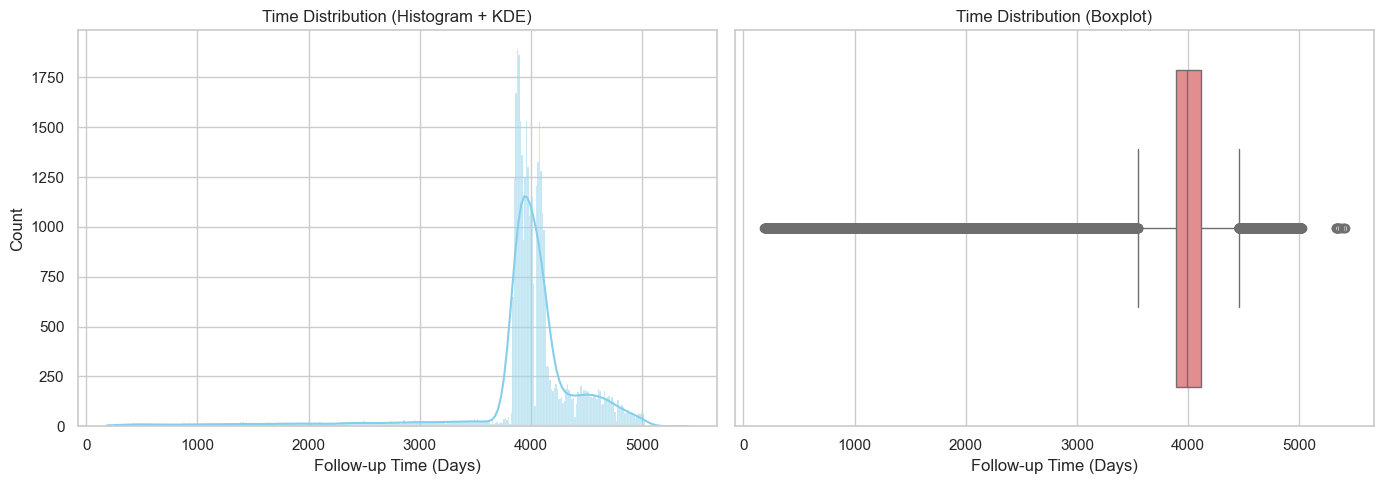

--- Time 描述性统计 ---
count    40463.000000
mean      3932.574747
std        654.804387
min        184.000000
25%       3891.000000
50%       3991.000000
75%       4119.000000
max       5412.000000
Name: time, dtype: float64

--- 发生事件(status=1)的时间分布 ---
count    4350.000000
mean     2522.857011
std      1084.849116
min       184.000000
25%      1695.000000
50%      2715.500000
75%      3413.000000
max      4964.000000
Name: time, dtype: float64


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格
sns.set(style="whitegrid")

# 创建一个画布，包含两个子图：直方图和箱线图
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 直方图 + 核密度曲线 (查看整体形态和偏态)
sns.histplot(df_clean['time'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Time Distribution (Histogram + KDE)')
axes[0].set_xlabel('Follow-up Time (Days)')

# 2. 箱线图 (查看中位数和离群点)
sns.boxplot(x=df_clean['time'], ax=axes[1], color='lightcoral')
axes[1].set_title('Time Distribution (Boxplot)')
axes[1].set_xlabel('Follow-up Time (Days)')

plt.tight_layout()
plt.show()

# 3. 打印详细的统计数值
print("--- Time 描述性统计 ---")
print(df_clean['time'].describe())

# 4. 检查事件发生的时刻分布（这对于 Cox 模型排错非常重要）
print("\n--- 发生事件(status=1)的时间分布 ---")
print(df_clean[df_clean['status'] == 1]['time'].describe())

In [87]:
import pandas as pd
import numpy as np
from statsmodels.duration.hazard_regression import PHReg
from statsmodels.tools import add_constant
import warnings

warnings.filterwarnings("ignore")

# =========================
# 1. 变量配置
# =========================
prs_col = "n3fa_grs"

  
# ======================================================
# 3. 定义三套模型协变量
# ======================================================
# Model 1
model1_vars = ["age_baseline", "sex"]


covs = model1_vars

# =========================
# 2. 样本清理 + 随访限制
# =========================
analysis_cols = [prs_col, "time", "status"] + covs

df_clean = (
    df[analysis_cols]
    .dropna()
    .query("age_baseline > 56 and time > 180")     # ⭐ 关键限制
    .copy()
    .reset_index(drop=True)
)

print(f">>> 年龄 >= 53岁且随访 > 180天: {len(df_clean)}")
print(df_clean["status"].value_counts())

# =========================
# 3. PRS 标准化 (1-SD)
# =========================
df_clean["prs_z"] = (
    df_clean[prs_col] - df_clean[prs_col].mean()
) / df_clean[prs_col].std()

# =========================
# A. 连续变量分析
# =========================
exog_cont = add_constant(df_clean[["prs_z"] + covs].astype(float))
ph_cont = PHReg(df_clean["time"], exog_cont, status=df_clean["status"])
res_cont = ph_cont.fit()

idx = exog_cont.columns.get_loc("prs_z")
hr = np.exp(res_cont.params[idx])
ci_l = np.exp(res_cont.params[idx] - 1.96 * res_cont.bse[idx])
ci_u = np.exp(res_cont.params[idx] + 1.96 * res_cont.bse[idx])
p = res_cont.pvalues[idx]

print("\n--- 连续 PRS（per 1-SD）---")
print(f"HR = {hr:.3f} ({ci_l:.3f}–{ci_u:.3f}), P = {p:.4f}")

# =========================
# B. 四分位分析
# =========================
df_clean["prs_q"] = pd.qcut(df_clean[prs_col], q=4, labels=[1, 2, 3, 4])

print("\n各分位事件发生率:")
print(df_clean.groupby("prs_q")["status"].mean())

q_dummies = pd.get_dummies(df_clean["prs_q"], prefix="Q", drop_first=True).astype(float)

exog_q = add_constant(pd.concat([q_dummies, df_clean[covs]], axis=1))
ph_q = PHReg(df_clean["time"], exog_q, status=df_clean["status"])
res_q = ph_q.fit()

print("\n--- 四分位结果 (Q1 为参考) ---")
for col in q_dummies.columns:
    idx = exog_q.columns.get_loc(col)
    hr = np.exp(res_q.params[idx])
    ci_l = np.exp(res_q.params[idx] - 1.96 * res_q.bse[idx])
    ci_u = np.exp(res_q.params[idx] + 1.96 * res_q.bse[idx])
    p = res_q.pvalues[idx]
    print(f"{col}: HR = {hr:.3f} ({ci_l:.3f}–{ci_u:.3f}), P = {p:.4f}")

# =========================
# C. P for trend
# =========================
median_map = df_clean.groupby("prs_q")[prs_col].median()
df_clean["prs_trend"] = df_clean["prs_q"].map(median_map)

exog_trend = add_constant(df_clean[["prs_trend"] + covs].astype(float))
ph_trend = PHReg(df_clean["time"], exog_trend, status=df_clean["status"])
res_trend = ph_trend.fit()

p_trend = res_trend.pvalues[exog_trend.columns.get_loc("prs_trend")]
print(f"\nP for trend: {p_trend:.4f}")


KeyError: "['time', 'status'] not in index"

In [49]:
import numpy as np
import pandas as pd
from patsy import dmatrix
from statsmodels.duration.hazard_regression import PHReg
from scipy.stats import chi2

# 假设变量名：
# df_clean: 原始 dataframe（已筛选好样本）
# prs_col: PRS 列名（字符串）
# covs: 协变量列名列表（不含 time/status/prs）

# 0. 复制并重置索引以确保所有数组对齐
df = df_clean.copy().reset_index(drop=True)

# 1. 检查并移除含 NaN 的行（至少要确保 time/status/prs/covs 没有 NaN）
needed_cols = [prs_col, "time", "status"] + covs
n_before = len(df)
df = df.dropna(subset=needed_cols).reset_index(drop=True)
n_after = len(df)
print(f"dropped {n_before - n_after} rows containing NaNs in required columns")

# 2. 确认 status 的编码（建议 1 = 事件, 0 = 截尾）
print(df["status"].value_counts())

# 3. 标准化 PRS（建议：z-score）
df["prs_z"] = (df[prs_col] - df[prs_col].mean()) / df[prs_col].std(ddof=0)

# 4. 生成 RCS 基函数（示例 df=3 -> 3 列基函数；检查实际列数）
rcs_matrix = dmatrix("cr(prs_z, df=3) - 1", {"prs_z": df["prs_z"]}, return_type="dataframe")
rcs_matrix.columns = [f"RCS_{i+1}" for i in range(rcs_matrix.shape[1])]

# 5. 构造 exog 矩阵（两套：reduced（线性prs） 和 full（RCS））
covs_df = df[covs].astype(float).reset_index(drop=True)

# reduced: 线性 PRS + covs
exog_reduced = pd.concat([df[["prs_z"]].reset_index(drop=True), covs_df], axis=1).astype(float)

# full: RCS 基函数 + covs
exog_full = pd.concat([rcs_matrix.reset_index(drop=True), covs_df], axis=1).astype(float)

# 6. 拟合两个模型
ph_reduced = PHReg(endog=df["time"].reset_index(drop=True), exog=exog_reduced, status=df["status"].reset_index(drop=True))
res_reduced = ph_reduced.fit()

ph_full = PHReg(endog=df["time"].reset_index(drop=True), exog=exog_full, status=df["status"].reset_index(drop=True))
res_full = ph_full.fit()

print("Reduced model summary:")
print(res_reduced.summary())

print("Full (RCS) model summary:")
print(res_full.summary())

# 7. 似然比检验（比较 full vs reduced）
llf_reduced = res_reduced.llf
llf_full = res_full.llf
lr_stat = 2 * (llf_full - llf_reduced)
df_diff = exog_full.shape[1] - exog_reduced.shape[1]
p_lr = 1 - chi2.cdf(lr_stat, df_diff)
print(f"\nLR test: chi2 = {lr_stat:.3f}, df = {df_diff}, p = {p_lr:.4f}")

# 8. （可选）Wald 检验：检验所有 RCS 系数是否为 0
# 需要构造限制表达式，例如 "RCS_1 = 0, RCS_2 = 0, RCS_3 = 0"
terms = ", ".join([f"{c} = 0" for c in rcs_matrix.columns])
wald_res = res_full.wald_test(terms)
print(f"Wald test p-value: {wald_res.pvalue}")


dropped 0 rows containing NaNs in required columns
status
0    36113
1     4350
Name: count, dtype: int64
Reduced model summary:
                          Results: PHReg
Model:                      PH Reg        Sample size:       40463
Dependent variable:         time          Num. events:       4350 
Ties:                       Breslow                               
------------------------------------------------------------------
              log HR log HR SE   HR      t    P>|t|  [0.025 0.975]
------------------------------------------------------------------
prs_z        -0.0034    0.0153 0.9966 -0.2207 0.8254 0.9673 1.0269
age_baseline  0.1197    0.0024 1.1272 50.2854 0.0000 1.1219 1.1324
sex          -0.1895    0.0309 0.8273 -6.1368 0.0000 0.7788 0.8790
Confidence intervals are for the hazard ratios
Full (RCS) model summary:
                           Results: PHReg
Model:                      PH Reg         Sample size:        40463
Dependent variable:         time           

In [50]:
from statsmodels.duration.hazard_regression import PHReg
from statsmodels.tools import add_constant
import numpy as np
import pandas as pd
prs_col = "n3fa_grs"
# 定义各模型协变量
model1_vars = ["age_baseline", "sex"]
model2_vars = model1_vars +   [ "education_baseline"]
model3_vars = model2_vars +  ["hypertension_baseline", "heart_disease_composite"]

all_models = {
    "Model1": model1_vars,
    "Model2": model2_vars,
    "Model3": model3_vars
}
covs_minimal = model3_vars
covs = covs_minimal
# 1-SD 标准化
df_matched["prs_z"] = (df_matched[prs_col] - df_matched[prs_col].mean()) / df_matched[prs_col].std()
# 构建自变量
exog_cont = df_matched[["prs_z"] + covs].astype(float)
exog_cont = add_constant(exog_cont)

ph_cont = PHReg(
    endog=df_matched["time"].values,
    exog=exog_cont,
    status=df_matched["status"].values
)

res_cont = ph_cont.fit()
print(f"参与模型的有效样本量: {int(res_cont.model.nobs)}")
# 提取结果
idx = exog_cont.columns.get_loc("prs_z")
beta = res_cont.params[idx]
se = res_cont.bse[idx]

HR = np.exp(beta)
CI_l = np.exp(beta - 1.96 * se)
CI_u = np.exp(beta + 1.96 * se)
pval = res_cont.pvalues[idx]

print(f"1-SD PRS: HR={HR:.3f} ({CI_l:.3f}-{CI_u:.3f}), P={pval:.4f}")
# PRS 四分位（Q1 作为参考）
df_matched["prs_q"] = pd.qcut(df_matched[prs_col], q=4, labels=False) + 1

# 查看每组样本数（论文里一般会报告）
print(df_matched["prs_q"].value_counts().sort_index())
# 构建四分位虚拟变量（Q1 作为 reference）
q_dummies = pd.get_dummies(df_matched["prs_q"], prefix="Q", drop_first=True)

exog_q = pd.concat([q_dummies, df_matched[covs]], axis=1).astype(float)
exog_q = add_constant(exog_q)

ph_q = PHReg(
    endog=df_matched["time"].values,
    exog=exog_q,
    status=df_matched["status"].values
)

res_q = ph_q.fit()
for q in q_dummies.columns:
    idx = exog_q.columns.get_loc(q)
    beta = res_q.params[idx]
    se = res_q.bse[idx]

    HR = np.exp(beta)
    CI_l = np.exp(beta - 1.96 * se)
    CI_u = np.exp(beta + 1.96 * se)
    pval = res_q.pvalues[idx]

    print(f"{q} vs Q1: HR={HR:.3f} ({CI_l:.3f}-{CI_u:.3f}), P={pval:.4f}")
# 计算每个四分位的 PRS 中位数
median_map = df_matched.groupby("prs_q")[prs_col].median()

# 用中位数替换分位编号
df_matched["prs_trend"] = df_matched["prs_q"].map(median_map)

exog_trend = df_matched[["prs_trend"] + covs].astype(float)
exog_trend = add_constant(exog_trend)

ph_trend = PHReg(
    endog=df_matched["time"].values,
    exog=exog_trend,
    status=df_matched["status"].values
)

res_trend = ph_trend.fit()

idx = exog_trend.columns.get_loc("prs_trend")
p_trend = res_trend.pvalues[idx]

print(f"P for trend = {p_trend:.4f}")


参与模型的有效样本量: 1728
1-SD PRS: HR=0.996 (0.950-1.044), P=0.8633
prs_q
1.0    432
2.0    432
3.0    432
4.0    432
Name: count, dtype: int64
Q_2.0 vs Q1: HR=1.158 (1.050-1.277), P=0.0033
Q_3.0 vs Q1: HR=1.030 (0.934-1.135), P=0.5600
Q_4.0 vs Q1: HR=1.110 (1.007-1.224), P=0.0362
P for trend = 0.9983


In [51]:
import pandas as pd
import numpy as np
from statsmodels.duration.hazard_regression import PHReg
from statsmodels.tools import add_constant
import warnings

warnings.filterwarnings("ignore")

# ---------------------------------------------------------
# 1. 配置变量与数据准备
# ---------------------------------------------------------
prs_col = "n3fa_grs"
model3_vars = ["age_baseline", "sex"]
covs = model3_vars

# 【关键步骤】构建分析专用的临时数据集
# 目的：
# 1. 剔除任何有缺失值的行，保证所有模型（连续/分类/趋势）的样本量完全一致 N。
# 2. reset_index(drop=True) 确保索引从 0 到 N 连续，防止 pd.concat 时数据错位。
cols_to_use = [prs_col, "time", "status"] + covs
df_clean = df_matched[cols_to_use].dropna().copy()
df_clean = df_clean.reset_index(drop=True)

print(f"原始 df_matched 行数: {len(df_matched)}")
print(f"清洗后用于分析的有效样本量: {len(df_clean)}")

# ---------------------------------------------------------
# 2. 连续变量模型 (1-SD PRS)
# ---------------------------------------------------------
# Z-score 标准化
df_clean["prs_z"] = (df_clean[prs_col] - df_clean[prs_col].mean()) / df_clean[prs_col].std()

exog_cont = add_constant(df_clean[["prs_z"] + covs].astype(float))

ph_cont = PHReg(
    endog=df_clean["time"],
    exog=exog_cont,
    status=df_clean["status"]
)
res_cont = ph_cont.fit()

# 提取结果
idx = exog_cont.columns.get_loc("prs_z")
beta = res_cont.params[idx]
se = res_cont.bse[idx]
HR = np.exp(beta)
CI_l = np.exp(beta - 1.96 * se)
CI_u = np.exp(beta + 1.96 * se)
pval = res_cont.pvalues[idx]

print(f"\n[连续变量 1-SD] HR={HR:.3f} ({CI_l:.3f}-{CI_u:.3f}), P={pval:.4f}")

# ---------------------------------------------------------
# 3. 四分位模型 (Quartiles)
# ---------------------------------------------------------
# 基于清洗后的数据计算四分位
df_clean["prs_q"] = pd.qcut(df_clean[prs_col], q=4, labels=[1, 2, 3, 4])

# 【逻辑检查】打印各组的事件发生率
# 如果 HR > 1，理论上 Q4 组的 status mean 应该比 Q1 高
print("\n[逻辑检查] 各四分位组的事件发生率 (Status Mean):")
print(df_clean.groupby("prs_q")["status"].mean())

# 生成虚拟变量 (Q1 Reference)
q_dummies = pd.get_dummies(df_clean["prs_q"], prefix="Q", drop_first=True).astype(float)

# 拼接数据 (由于已经 reset_index，这里 concat 是安全的)
exog_q = pd.concat([q_dummies, df_clean[covs].astype(float)], axis=1)
exog_q = add_constant(exog_q)

ph_q = PHReg(
    endog=df_clean["time"],
    exog=exog_q,
    status=df_clean["status"]
)
res_q = ph_q.fit()

print("\n[四分位结果 vs Q1]")
for q in q_dummies.columns:
    idx = exog_q.columns.get_loc(q)
    beta = res_q.params[idx]
    se = res_q.bse[idx]
    HR = np.exp(beta)
    CI_l = np.exp(beta - 1.96 * se)
    CI_u = np.exp(beta + 1.96 * se)
    pval = res_q.pvalues[idx]
    print(f"{q}: HR={HR:.3f} ({CI_l:.3f}-{CI_u:.3f}), P={pval:.4f}")

# ---------------------------------------------------------
# 4. 趋势检验 (P for trend)
# ---------------------------------------------------------
# 计算每组的中位数
median_map = df_clean.groupby("prs_q")[prs_col].median()
# 映射回数据
df_clean["prs_trend"] = df_clean["prs_q"].map(median_map)

exog_trend = add_constant(df_clean[["prs_trend"] + covs].astype(float))

ph_trend = PHReg(
    endog=df_clean["time"],
    exog=exog_trend,
    status=df_clean["status"]
)
res_trend = ph_trend.fit()

idx_trend = exog_trend.columns.get_loc("prs_trend")
p_trend = res_trend.pvalues[idx_trend]

print(f"\n[趋势检验] P for trend = {p_trend:.4f}")

原始 df_matched 行数: 7380
清洗后用于分析的有效样本量: 1728

[连续变量 1-SD] HR=0.994 (0.949-1.041), P=0.7949

[逻辑检查] 各四分位组的事件发生率 (Status Mean):
prs_q
1    1.0
2    1.0
3    1.0
4    1.0
Name: status, dtype: float64

[四分位结果 vs Q1]
Q_2: HR=1.078 (0.956-1.215), P=0.2216
Q_3: HR=0.950 (0.839-1.076), P=0.4202
Q_4: HR=1.031 (0.907-1.171), P=0.6423

[趋势检验] P for trend = 0.9350
